<a href="https://colab.research.google.com/github/9B8DY6/Data-mining/blob/master/3%EC%A1%B0_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_%EB%8C%80%EC%B2%B4_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
root='/content/drive/My Drive/cardio_train_bmi_pulse.csv'
data=pd.read_csv(root)


In [ ]:
data.drop(data[(data['height'] > data['height'].quantile(0.975)) | (data['height'] < data['height'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.975)) | (data['weight'] < data['weight'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.975)) | (data['ap_hi'] < data['ap_hi'].quantile(0.025))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.975)) | (data['ap_lo'] < data['ap_lo'].quantile(0.025))].index,inplace=True)

data.drop("age",axis=1,inplace=True)
data.drop("height",axis=1,inplace=True)
data.drop("weight",axis=1,inplace=True)
data.drop("ap_hi",axis=1,inplace=True)
data.drop("ap_lo",axis=1,inplace=True)

data

,id,age(year),gender,BMI,pulse,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,21.967120,30,1,1,0,0,1,0
1,1,55,1,34.927679,50,3,1,0,0,1,1
2,2,51,1,23.507805,60,3,1,0,0,0,1
3,3,48,2,28.710479,50,1,1,0,0,1,1
4,4,47,1,23.011177,40,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
65529,93532,53,1,20.829995,40,1,1,0,0,0,1
65530,93535,61,1,25.806452,40,1,1,0,0,1,0
65531,93537,56,1,32.830980,60,3,1,0,1,1,0
65532,93538,55,1,29.777778,50,1,1,0,0,1,0


In [ ]:
from sklearn.preprocessing import minmax_scale #데이터 정규화
data_nor = minmax_scale(data)
data_nor2 = pd.DataFrame(data_nor, columns=data.columns)

In [ ]:
features, labels, ID = data_nor2.iloc[:,1:10], data_nor2.iloc[:,10], data.iloc[:,0:1]

x=(torch.tensor(features.values).float())
y=torch.tensor(labels.values).reshape(-1,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.2,random_state=33)

In [ ]:
print(x_train.shape, x_test.shape)

torch.Size([45158, 9]) torch.Size([11290, 9])


y의 0과 1의 비율이 거의 1:1입니다.
y_train, y_test도 이 비율이 지켜진 것을 밑 코드를 통해 확인할 수 있습니다.

In [ ]:
index, count = np.unique(y, return_counts=True)
print(index)
print(count)

[0. 1.]
[28839 27609]


y_train, y_test 에서 y의 비율이 지켜졌는지 확인해봅시다.

In [ ]:
index, count = np.unique(y_train, return_counts=True)
print(index)
print(count)
index, count = np.unique(y_test, return_counts=True)
print(index)
print(count)

[0. 1.]
[23071 22087]
[0. 1.]
[5768 5522]


In [ ]:
# setting hyper-parameters
batch_size = 256
learning_rate = 0.002
num_epochs = 1000
num_workers = 0

train_iter=DataLoader(dataset=TensorDataset(x_train,y_train),batch_size=batch_size,shuffle=True)
test_iter=DataLoader(dataset=TensorDataset(x_test,y_test),batch_size=batch_size,shuffle=False)

In [ ]:
# defining model
net = nn.Sequential(
    nn.Linear(9,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,2))

# parameter initialization
torch.nn.init.normal_(net[0].weight,std=0.01)
torch.nn.init.normal_(net[2].weight,std=0.01)

# loss function and algorithm
loss = torch.nn.CrossEntropyLoss() # loss
alg = torch.optim.SGD(net.parameters(),lr=learning_rate,weight_decay=0.001) # sgd

# display model
net

Sequential(
  (0): Linear(in_features=9, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=2, bias=True)
)

original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256,

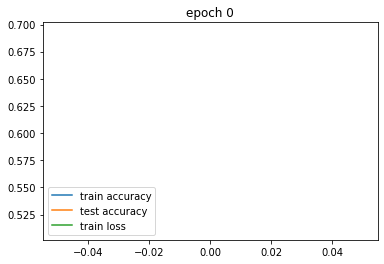

train loss :  0.6928723006598694
train accuracy :  0.5108950734138489
test accuracy :  0.5108945965766907
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.Size([256, 9])
x.shape
torch.Size([256, 9])
original x shape
torch.

KeyboardInterrupt: ignored

In [ ]:
# training the model
loss_train = np.array([])
accs_train = np.array([])
accs_test = np.array([])

for epoch in range(num_epochs):
  i=0
  l_epoch = 0
  correct = 0

  for x,y in train_iter:
    i=i+1
    print("original x shape")
    print(x.shape)
    x=x.view(-1,9)
    print("x.shape")
    print(x.shape)
    y_hat=net(x)
    correct += (y_hat.argmax(dim=1)==y).sum()
    l=loss(y_hat,y.long())
    l_epoch+=l
    alg.zero_grad()
    l.backward()
    alg.step()


  loss_train = np.append(loss_train,l_epoch.detach().numpy()/i)
  accs_train = np.append(accs_train,correct/float(len(x_train)))

  correct = 0
  for x,y in test_iter:
    y_hat = net(x.view(-1,9))
    correct += (y_hat.argmax(dim=1)==y).sum()
  accs_test = np.append(accs_test,correct/float(len(x_test)))

  if (epoch%100) == 0:
    plt.plot(accs_train, label='train accuracy')
    plt.plot(accs_test, label='test accuracy')
    plt.plot(loss_train, label='train loss')
    plt.legend(loc = 'lower left')
    plt.title('epoch %d' %(epoch))
    plt.show()
    
    print('train loss : ', loss_train[-1])
    print('train accuracy : ', accs_train[-1])
    print('test accuracy : ', accs_test[-1])

plt.plot(accs_train, label='train accuracy')
plt.plot(accs_test, label='test accuracy')
plt.plot(loss_train, label='train loss')
plt.legend(loc = 'lower left')
plt.title('epoch %d' %(epoch))
plt.show()
    
print('train loss : ', loss_train[-1])
print('train accuracy : ', accs_train[-1])
print('test accuracy : ', accs_test[-1])

In [ ]:
def get_csv_labels(labels):
    text_labels = ['발병x','발병ㅇ']
    return [text_labels[int(i)] for i in labels]

In [ ]:
for i in range(len(x_test)) : 
  y1 = net(x_test[i])
  y1_softmax = y1.softmax(dim=0)
  if y1_softmax.max() > 0.8 and get_csv_labels([int(y_test[i])])!=get_csv_labels([y1_softmax.argmax(dim=0)]): 
    print("x_test patient num : ",i)
    print('label: ',get_csv_labels([int(y_test[i])]))
    print('predicted: %s with probability %f'%(get_csv_labels([y1_softmax.argmax(dim=0)]), y1_softmax.max()))

In [ ]:
for i in range(len(x_test)) : 
  y1 = net(x_test[i])
  y1_softmax = y1.softmax(dim=0)
  if y1_softmax.max() > 0.8 and get_csv_labels([int(y_test[i])])==get_csv_labels([y1_softmax.argmax(dim=0)]): 
    print("x_test patient num : ",i)
    print('label: ',get_csv_labels([int(y_test[i])]))
    print('predicted: %s with probability %f'%(get_csv_labels([y1_softmax.argmax(dim=0)]), y1_softmax.max()))

In [ ]:
from sklearn.metrics import classification_report
a=[]
for i in range(len(x_train)) : 
  y1=net(x_train[i])
  y1_softmax = y1.softmax(dim=0)
  a=np.array(a)
  a=np.append(a,[int(y1_softmax.argmax(dim=0))],)
  
print(a)


[0. 0. 1. ... 1. 1. 1.]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.array(y_train), a, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.68      0.73      0.71     23071
     class 1       0.70      0.64      0.67     22087

    accuracy                           0.69     45158
   macro avg       0.69      0.69      0.69     45158
weighted avg       0.69      0.69      0.69     45158



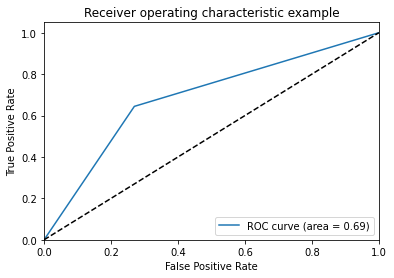

In [ ]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(np.array(y_train), a, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()